# Ceny Nieruchomości
## Rachunek Prawdopodobieństwa i Statystyka
Hubert Tułacz


W tym pliku przedstawiona jest analiza wstępna cen mieszkań w kilku największych miastach w Polsce.
Dane zostały pobrane z __[strona z danymi na kaggle](https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland)__

In [1]:
import pandas as pd
import sqlite3
import csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Import danych i zapisanie ich w bazie SQlite
Do importu używam biblioteki sqlite3 jak i csv służących odpowiednio do obsługi relacyjnych baz danych jak i plików csv

In [2]:
csv_ap = './datacsv/apartments_pl_2024_01.csv'
db = './datadb/apartments.db'

In [13]:
conn = sqlite3.connect(db)
cursor = conn.cursor()

In [6]:
with open(csv_ap, "r") as csv_file:
    csv_reader = csv.reader(csv_file)
    headers = next(csv_reader)
    create_table = f"CREATE TABLE IF NOT EXISTS tabela ({headers[0]} TEXT, {headers[1]} TEXT, {headers[2]} TEXT, {headers[3]} FLOAT, {headers[4]} INTEGER, {headers[5]} INTEGER, {headers[6]} INTEGER, {headers[7]} INTEGER, {headers[8]} FLOAT, {headers[9]} FLOAT, {headers[10]} FLOAT, {headers[11]} INTEGER, {headers[12]} FLOAT, {headers[13]} FLOAT, {headers[14]} FLOAT, {headers[15]} FLOAT, {headers[16]} FLOAT, {headers[17]} FLOAT, {headers[18]} FLOAT, {headers[19]} TEXT, {headers[20]} TEXT, {headers[21]} TEXT, {headers[22]} TEXT, {headers[23]} TEXT, {headers[24]} TEXT, {headers[25]} TEXT, {headers[26]} TEXT, {headers[27]} FLOAT);"
    cursor.execute(create_table)
    for row in csv_reader:
        insert_query = f"INSERT INTO tabela VALUES ({', '.join(['?' for _ in row])});"
        cursor.execute(insert_query,row)
conn.commit()

Dane na potrzeby notebooka przechowuję w DataFrame z biblioteki pandas

In [3]:
df = pd.read_csv(csv_ap, sep=',')

In [ ]:
conn.close()

In [4]:
df.sample(10)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
7451,2501145c451d3942baa2eadceb109ae9,wroclaw,tenement,34.79,2.0,3.0,4.0,1900.0,51.110500,17.025800,...,0.097,condominium,brick,NaN,no,no,no,no,yes,556000
13566,1fd9436e681f83d6676e299f6fef511e,warszawa,blockOfFlats,58.00,3.0,1.0,9.0,1953.0,52.201370,21.036560,...,0.078,condominium,NaN,NaN,no,no,yes,no,yes,819000
2643,5e5595e480d286bbd716a1bbb06c569d,krakow,apartmentBuilding,78.00,3.0,3.0,4.0,2023.0,50.044051,19.987371,...,0.473,condominium,brick,NaN,yes,yes,yes,no,no,1386000
6816,a8037890eaad636d2f06cc416961326b,wroclaw,tenement,36.00,2.0,3.0,5.0,1900.0,51.114060,17.036250,...,0.348,condominium,brick,NaN,no,yes,yes,no,no,443000
6765,7087b3e5f3734c93d39d4868bcf5248c,wroclaw,NaN,59.30,3.0,3.0,9.0,2012.0,51.114946,17.017693,...,0.359,condominium,NaN,NaN,yes,yes,yes,no,no,740000
6904,df35bf511425b042c20ae76d4f5fa8fc,wroclaw,blockOfFlats,40.00,2.0,1.0,1.0,2001.0,51.050113,17.082597,...,1.129,condominium,NaN,low,no,yes,no,no,no,429000
12985,edf1dc3b6e6ff91383d0835446ed5801,warszawa,blockOfFlats,65.00,2.0,4.0,6.0,2000.0,52.283333,21.033333,...,0.245,condominium,NaN,premium,yes,no,yes,no,no,878000
11150,afb680755d1135157e4c50dc4460571c,warszawa,NaN,36.70,2.0,4.0,11.0,NaN,52.192770,21.014300,...,0.103,condominium,NaN,NaN,no,no,yes,no,no,595000
8935,77340ecd56d72c8648f9f18878b5061b,lodz,apartmentBuilding,38.95,2.0,NaN,5.0,2023.0,51.765100,19.475800,...,0.314,condominium,brick,NaN,no,yes,yes,no,no,375247
6600,e765862bc4c9307679cf625aa76373c2,wroclaw,apartmentBuilding,59.30,3.0,3.0,8.0,2012.0,51.111559,17.021583,...,0.150,condominium,brick,NaN,yes,yes,yes,no,no,745000


In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15521 entries, 0 to 15520
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15521 non-null  object 
 1   city                  15521 non-null  object 
 2   type                  12065 non-null  object 
 3   squareMeters          15521 non-null  float64
 4   rooms                 15521 non-null  float64
 5   floor                 12707 non-null  float64
 6   floorCount            15329 non-null  float64
 7   buildYear             13020 non-null  float64
 8   latitude              15521 non-null  float64
 9   longitude             15521 non-null  float64
 10  centreDistance        15521 non-null  float64
 11  poiCount              15521 non-null  float64
 12  schoolDistance        15503 non-null  float64
 13  clinicDistance        15464 non-null  float64
 14  postOfficeDistance    15496 non-null  float64
 15  kindergartenDistanc

(15521, 28)

## Oczyszczanie danych
Usunięcie niepotrzebnych danych takich jak informacje o innych miastach

In [6]:
df = df[df['city'].isin(['warszawa','krakow','wroclaw','lodz','poznan'])]
df.drop(['id','latitude','longitude','ownership'],axis=1,inplace=True)
df['price/squareMeter'] = df['price']/df['squareMeters']

In [7]:
bool_col = ['hasParkingSpace','hasBalcony','hasElevator', 'hasSecurity', 'hasStorageRoom']
df[bool_col] = df[bool_col].apply(lambda x: x.map({'yes':1, 'no':0}))

In [8]:
df.sample(10)

,city,type,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,poiCount,schoolDistance,...,pharmacyDistance,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,price/squareMeter
3412,krakow,blockOfFlats,48.57,2.0,7.0,9.0,2019.0,4.47,9.0,0.117,...,0.452,brick,NaN,0,1,1.0,0,0,964000,19847.642578
13571,warszawa,apartmentBuilding,83.27,3.0,7.0,10.0,2005.0,4.18,18.0,0.265,...,0.094,brick,NaN,1,0,1.0,1,1,1500000,18013.690405
1782,krakow,tenement,85.21,3.0,NaN,4.0,1890.0,0.89,28.0,0.171,...,0.165,brick,NaN,1,0,0.0,0,1,1278150,15000.000000
7239,wroclaw,apartmentBuilding,68.00,3.0,1.0,3.0,2011.0,6.72,7.0,0.977,...,0.355,brick,NaN,1,1,0.0,0,0,825000,12132.352941
2760,krakow,NaN,70.00,4.0,2.0,11.0,1965.0,2.59,12.0,0.396,...,0.167,NaN,NaN,0,1,0.0,0,1,1030000,14714.285714
8566,lodz,apartmentBuilding,34.87,1.0,1.0,6.0,2022.0,4.54,5.0,0.137,...,0.285,brick,NaN,0,1,1.0,0,0,390000,11184.399197
6915,wroclaw,NaN,65.00,3.0,5.0,6.0,NaN,1.06,11.0,0.444,...,0.478,NaN,NaN,0,1,0.0,0,0,1349000,20753.846154
10766,warszawa,blockOfFlats,88.40,3.0,3.0,3.0,2009.0,7.85,6.0,0.623,...,0.072,NaN,NaN,1,1,0.0,0,1,1220000,13800.904977
11395,warszawa,blockOfFlats,61.00,3.0,3.0,3.0,2004.0,13.61,7.0,0.276,...,0.058,brick,NaN,1,0,0.0,0,1,649000,10639.344262
13903,warszawa,NaN,67.10,3.0,NaN,2.0,2005.0,9.13,12.0,0.497,...,0.348,NaN,NaN,0,1,0.0,0,0,999790,14900.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10304 entries, 1229 to 14773
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  10304 non-null  object 
 1   type                  8101 non-null   object 
 2   squareMeters          10304 non-null  float64
 3   rooms                 10304 non-null  float64
 4   floor                 8439 non-null   float64
 5   floorCount            10163 non-null  float64
 6   buildYear             8800 non-null   float64
 7   centreDistance        10304 non-null  float64
 8   poiCount              10304 non-null  float64
 9   schoolDistance        10303 non-null  float64
 10  clinicDistance        10271 non-null  float64
 11  postOfficeDistance    10298 non-null  float64
 12  kindergartenDistance  10298 non-null  float64
 13  restaurantDistance    10284 non-null  float64
 14  collegeDistance       10171 non-null  float64
 15  pharmacyDistance     

Usuwam niekompletne wiersze z danych

In [10]:
df.dropna(inplace=True)

Ostatecznie w DataFrame znajdują się następujące informacje:
> **city** - Miasto z którego pochodzi oferta (Warszawa, Kraków, Wrocław, Łódź lub Poznań)
> **type** - Typ budynku kamienica/blok mieszkalny/dom
> **squareMeters** - Metraż
> **rooms** - Liczba pokoi
> **floor** - Piętro
> **floorCount** - Liczba pięter w budynku
> **buildYear** - Rok w którym wybudowany został budynek
> **centreDistance** - Dystans od centrum miasta w km
> **poiCount** - Liczba "punktów zainteresowania" w promieniu 500m (szkoły, kliniki, restauracje, przedszkola, poczta, uczelnie, apteki)
> **[nazwa puntku zainteresowania]distance** - Dystans do najbliższego punktu zainteresowania tego typu
> **condition** - Stan budynku
> **hasParkingSpace** - Czy ma miejsca parkingowe
> **hasBalcony** - Czy ma balkon
> **hasElevator** - Czy ma winde
> **hasSecurity** - Czy ma ochrone
> **hasStorageRoom** - Czy ma przestrzeń do składowania
> **price** - Cena z jaką oferta została wystawiona
> **price/squareMeter** - Cena za metr

In [11]:
col = df.columns.difference(['hasParkingSpace','hasStorageRoom','hasBalcony','hasElevator','hasSecurity'])
df[col].describe()

,buildYear,centreDistance,clinicDistance,collegeDistance,floor,floorCount,kindergartenDistance,pharmacyDistance,poiCount,postOfficeDistance,price,price/squareMeter,restaurantDistance,rooms,schoolDistance,squareMeters
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1.218000e+03,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,1984.824302,4.489754,0.859387,1.395428,3.542693,5.857143,0.295127,0.290865,23.935140,0.460479,9.616286e+05,15834.953397,0.268587,2.756979,0.360924,61.698941
std,35.579813,2.796532,0.795404,1.082060,2.847577,3.475840,0.242810,0.250888,28.438084,0.327482,4.718430e+05,5108.204507,0.247511,0.976329,0.300655,23.220957
min,1860.000000,0.160000,0.014000,0.026000,1.000000,1.000000,0.020000,0.006000,0.000000,0.009000,1.900000e+05,4597.383453,0.002000,1.000000,0.021000,25.000000
25%,1961.250000,2.152500,0.322250,0.542500,2.000000,4.000000,0.147000,0.137000,8.000000,0.237250,6.690000e+05,12165.781400,0.105000,2.000000,0.171000,45.325000
50%,1996.500000,4.100000,0.625500,1.069500,3.000000,5.000000,0.238000,0.227500,16.000000,0.394000,8.500000e+05,15516.995614,0.197000,3.000000,0.283000,58.000000
75%,2016.000000,6.180000,1.066500,2.064000,4.000000,7.000000,0.371000,0.369750,28.000000,0.590750,1.150000e+06,19037.820660,0.352000,3.000000,0.441500,73.000000
max,2024.000000,16.360000,4.789000,4.977000,29.000000,29.000000,2.956000,2.071000,210.000000,2.600000,3.200000e+06,30113.924051,1.971000,6.000000,2.448000,150.000000


In [12]:
def draw_hist(data,x,y,title,color='skyblue',edgecolor='black',label =''):
    plt.hist(data,color=color,edgecolor=edgecolor,label=label)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

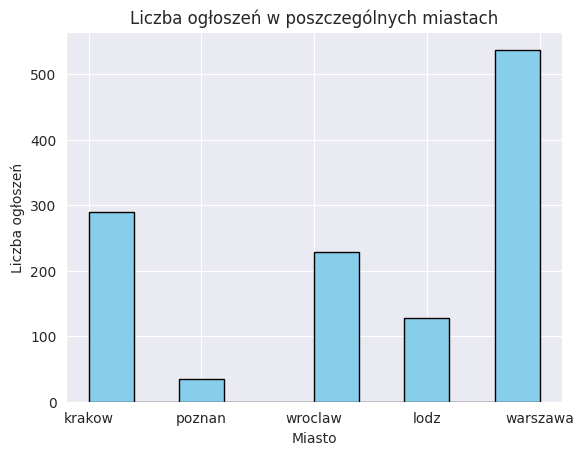

In [13]:
draw_hist(df['city'],'Miasto','Liczba ogłoszeń','Liczba ogłoszeń w poszczególnych miastach')
plt.show()

Na podstawie powyższego histogramu widać znaczące różnice w liczbie ogłoszeń w zależności od miasta

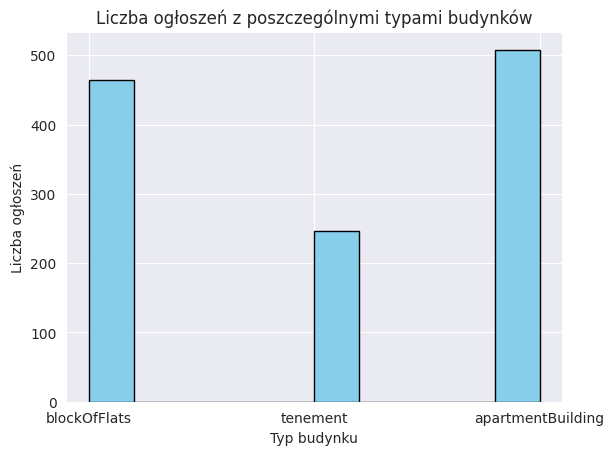

In [14]:
draw_hist(df['type'],'Typ budynku','Liczba ogłoszeń', 'Liczba ogłoszeń z poszczególnymi typami budynków')
plt.show()

Na powyższym wykresie widać, że najwięcej ofert w dużych miastach dotyczy mieszkań w blokach

In [15]:
cities = {'warszawa': 'Warszawa', 'krakow': 'Kraków', 'wroclaw': 'Wrocław', 'lodz': 'Łódź', 'poznan': 'Poznań'}

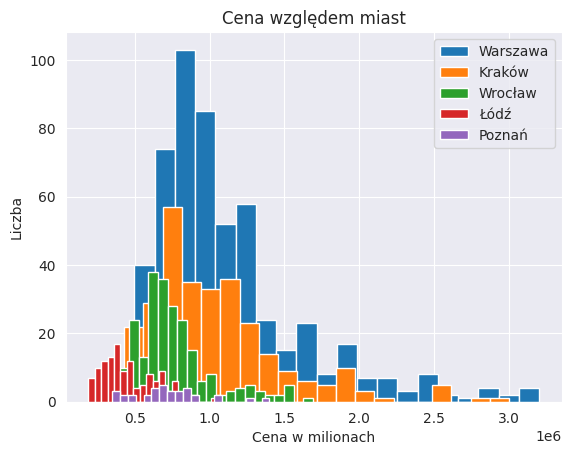

In [16]:
plt.title("Cena względem miast")
for city in cities.keys():
    plt.hist(df[df['city'] == city]['price'],bins=20,label=cities.get(city))
plt.xlabel('Cena w milionach')
plt.ylabel('Liczba')
plt.legend()
plt.show()

In [17]:
group_by_city = df.groupby('city')['price']
group_by_city.describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
krakow,290.0,1.044592e+06,444924.109751,429000.0,739000.0,949000.0,1241500.0,3000000.0
lodz,128.0,4.736051e+05,183809.196547,190000.0,329750.0,439000.0,601750.0,1050000.0
poznan,34.0,7.291296e+05,237371.566318,349000.0,616250.0,699000.0,846750.0,1400000.0
warszawa,537.0,1.130794e+06,501742.580009,499000.0,799000.0,990000.0,1295640.0,3200000.0
wroclaw,229.0,7.671784e+05,250499.305136,397700.0,610000.0,716000.0,850000.0,1690000.0


Wszystkie miasta z wyjątkiem Łodzi mają największe skupisko w podobnym miejscu czyli około 600-800 tyś. złotych, a w przypadku Łodzi jest to około 300 tyś. złotych

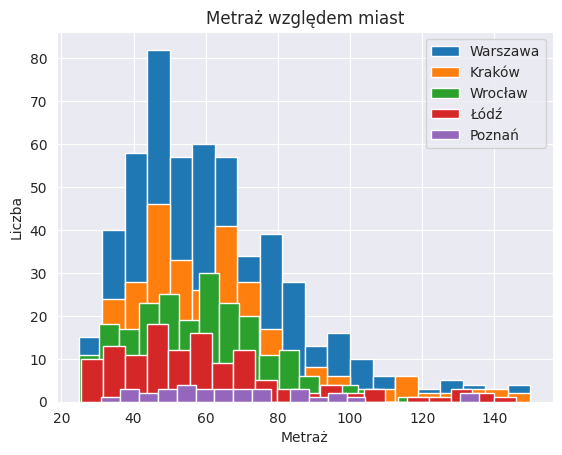

In [18]:
plt.title("Metraż względem miast")
for city in cities.keys():
    plt.hist(df[df['city'] == city]['squareMeters'],bins=20,label=cities.get(city))
plt.xlabel('Metraż')
plt.ylabel('Liczba')
plt.legend()
plt.show()

In [19]:
group_by_city = df.groupby('city')['squareMeters']
group_by_city.describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
krakow,290.0,62.133276,23.981986,25.00,46.0000,58.035,71.925,150.00
lodz,128.0,60.827344,26.299899,25.55,42.3475,55.830,71.485,145.93
poznan,34.0,68.825882,24.911761,31.00,51.6000,64.400,83.055,135.70
warszawa,537.0,62.303464,23.295625,25.00,45.6200,57.700,74.300,150.00
wroclaw,229.0,59.160349,19.562485,25.00,43.5800,59.810,70.300,135.50


Metraż ofert jest bardzo do siebie zbliżony, Poznań według tych danych ma największe mieszkania ale próbka ofert z Poznania jest znacznie mniejsza.

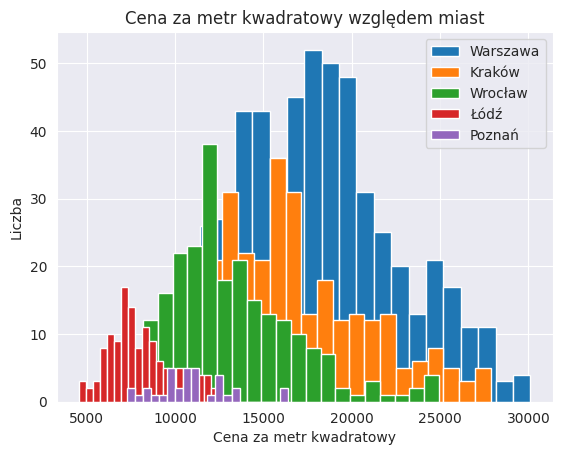

In [20]:
plt.title("Cena za metr kwadratowy względem miast")
for city in cities.keys():
    prices_per_square_meter = df[df['city'] == city]['price'] / df[df['city'] == city]['squareMeters']
    plt.hist(prices_per_square_meter, bins=20, label=cities.get(city))

plt.xlabel('Cena za metr kwadratowy')
plt.ylabel('Liczba')
plt.legend()
plt.show()

In [21]:
group_by_city = df.groupby('city')['price/squareMeter']
group_by_city.describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
krakow,290.0,17056.612070,4062.358372,10000.000000,13928.571429,16231.884058,19617.018958,27880.004461
lodz,128.0,8046.239641,1788.771633,4597.383453,6846.395881,7597.499616,8959.550771,12432.432432
poznan,34.0,10873.969900,2101.382425,7262.474368,9660.148775,10648.077725,12218.321399,16400.000000
warszawa,537.0,18354.062974,4313.477934,10432.835821,14872.340426,18033.946252,20948.717949,30113.924051
wroclaw,229.0,13470.699866,3466.291377,8193.548387,11034.482759,12581.168831,15294.117647,24948.717949


Mimo zbliżonych najczęstszych wartości ofert, to ceny za metr w Warszawie i Krakowie znacząco odbiegają od reszty miast

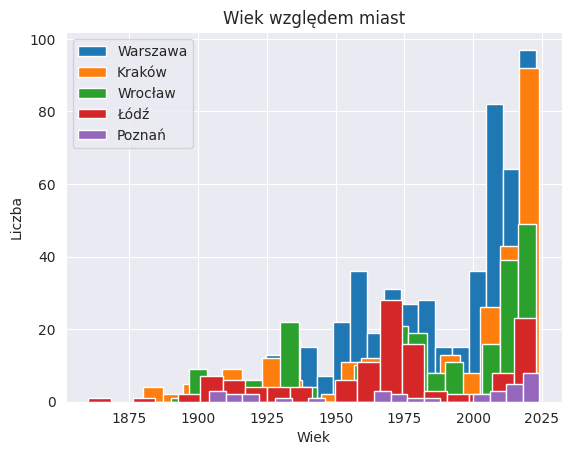

In [22]:
plt.title("Wiek względem miast")
for city in cities.keys():
    plt.hist(df[df['city'] == city]['buildYear'],bins=20,label=cities.get(city))
plt.xlabel('Wiek')
plt.ylabel('Liczba')
plt.legend()
plt.show()

In [23]:
group_by_city = df.groupby('city')['buildYear']
group_by_city.describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
krakow,290.0,1988.706897,38.457008,1880.0,1967.25,2008.5,2019.00,2024.0
lodz,128.0,1969.750000,37.565271,1860.0,1953.50,1970.0,2006.00,2023.0
poznan,34.0,1980.764706,43.013781,1904.0,1950.25,2004.0,2016.75,2024.0
warszawa,537.0,1987.836127,30.447642,1900.0,1964.00,2000.0,2014.00,2023.0
wroclaw,229.0,1981.873362,38.340312,1890.0,1959.00,1990.0,2015.00,2023.0


W Krakowie i Warszawie jest najwięcej nowych mieszkań, a w Łodzi jest ich najmniej co może świadczyć o zapotrzebowaniu na tych lokalnych rynkach

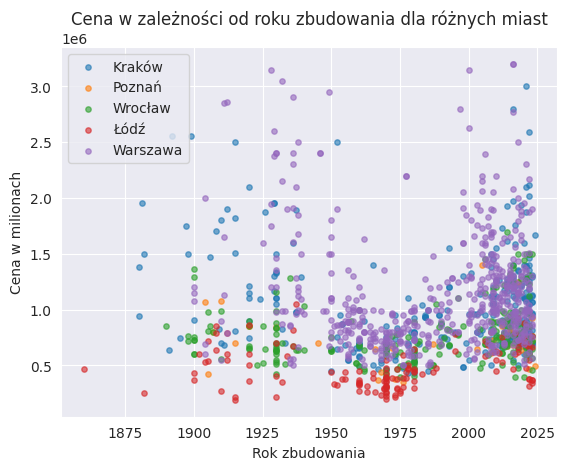

In [24]:
for city in df['city'].unique():
    city_data = df[df['city'] == city]
    plt.scatter(city_data['buildYear'], city_data['price'], label=cities.get(city), alpha=0.6,s=15)

plt.xlabel('Rok zbudowania')
plt.ylabel('Cena w milionach')
plt.title('Cena w zależności od roku zbudowania dla różnych miast')
plt.legend()

plt.show()

Na tym wykresie można zaobserwować, że oferty ze starych budynków w Krakowie i Warszawie są znacznie droższe od ofert w budynkach równie starych w innych miastach

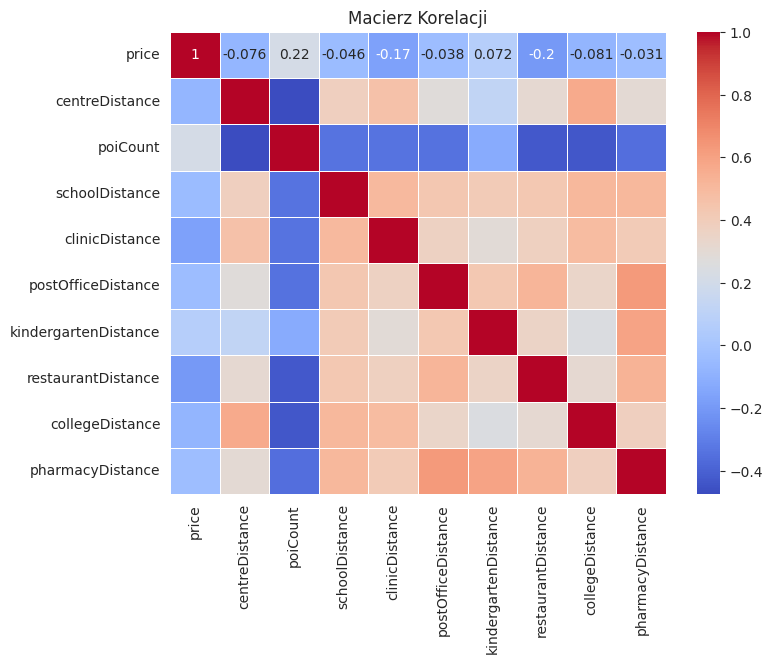

In [25]:
scaler = StandardScaler()
columns = df.columns.difference(['city','type','condition','buildingMaterial'])
df_norm = pd.DataFrame(scaler.fit_transform(df[columns]),columns=columns)
correlation_matrix = df_norm[['price',"centreDistance",'poiCount','schoolDistance','clinicDistance','postOfficeDistance','kindergartenDistance','restaurantDistance','collegeDistance','pharmacyDistance']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Macierz Korelacji')
plt.show()

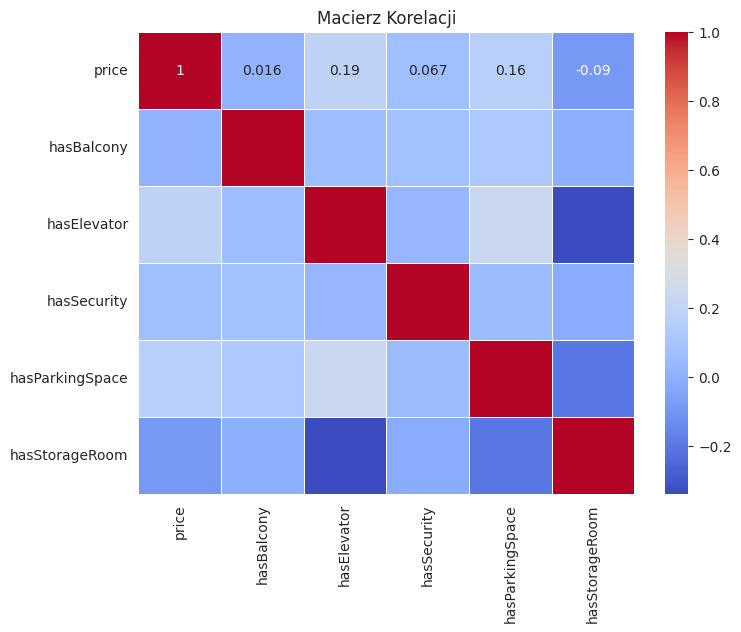

In [26]:
scaler = StandardScaler()
columns = df.columns.difference(['city','type','condition','buildingMaterial'])
df_norm = pd.DataFrame(scaler.fit_transform(df[columns]),columns=columns)
correlation_matrix = df_norm[['price',"hasBalcony",'hasElevator', 'hasSecurity', 'hasParkingSpace', 'hasStorageRoom']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Macierz Korelacji')
plt.show()

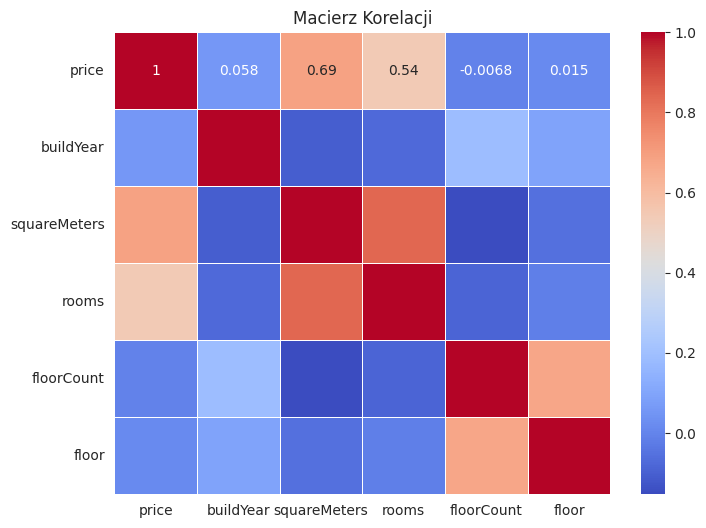

In [27]:
scaler = StandardScaler()
columns = df.columns.difference(['id','city','type','condition','buildingMaterial',])
df_norm = pd.DataFrame(scaler.fit_transform(df[columns]),columns=columns)
correlation_matrix = df_norm[['price',"buildYear",'squareMeters', 'rooms', 'floorCount', 'floor']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Macierz Korelacji')
plt.show()